# TASK 2: K-Means Clustering 

Dataset Shape: (150, 4)

First 5 rows of dataset:
   Feature1  Feature2  Feature3  Feature4
0       5.1       3.5       1.4       0.2
1       4.9       3.0       1.4       0.2
2       4.7       3.2       1.3       0.2
3       4.6       3.1       1.5       0.2
4       5.0       3.6       1.4       0.2

Scaled Data (first 5 rows):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


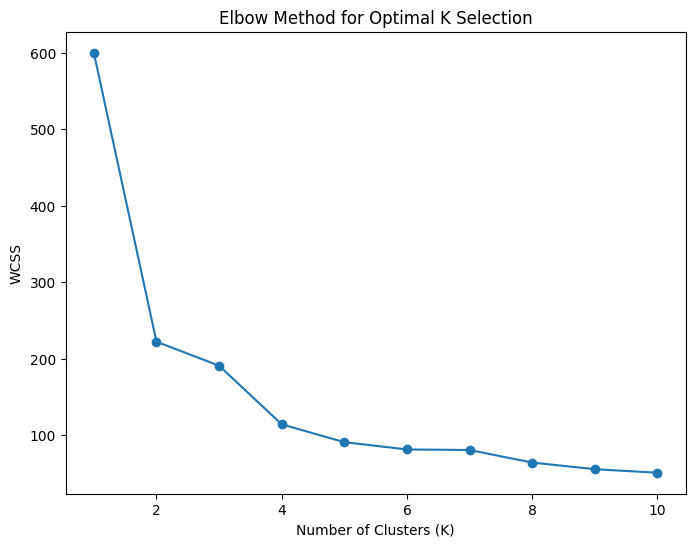


Clustered Dataset (first 5 rows):
   Feature1  Feature2  Feature3  Feature4  Cluster
0       5.1       3.5       1.4       0.2        1
1       4.9       3.0       1.4       0.2        2
2       4.7       3.2       1.3       0.2        2
3       4.6       3.1       1.5       0.2        2
4       5.0       3.6       1.4       0.2        1


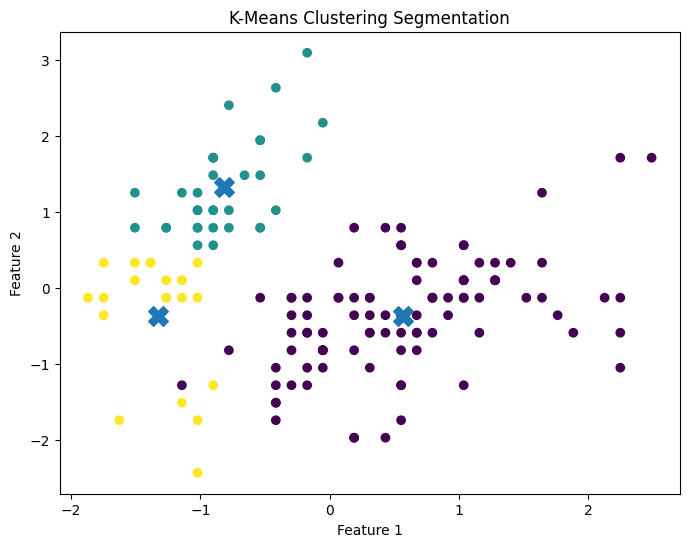


Cluster Summary (Mean Values):
         Feature1  Feature2  Feature3  Feature4
Cluster                                        
0        6.314583  2.895833  4.973958  1.703125
1        5.169697  3.630303  1.493939  0.272727
2        4.747619  2.895238  1.757143  0.352381


In [8]:
# ================================
# TASK 2: K-Means Clustering 
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -------- Load Dataset (Python array format) --------
with open("Task2_Data_Clustering.txt", "r") as file:
    content = file.read()

# Convert array text into numpy array
data = eval(content, {"array": np.array})

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Feature1", "Feature2", "Feature3", "Feature4"])

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of dataset:")
print(df.head())

# -------- Data Preprocessing (Scaling) --------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("\nScaled Data (first 5 rows):")
print(scaled_data[:5])

# -------- Elbow Method --------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K Selection")
plt.show()

# -------- Apply K-Means (K = 3) --------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels
df["Cluster"] = clusters

print("\nClustered Dataset (first 5 rows):")
print(df.head())

# -------- Cluster Visualization --------
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='X', s=200)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Segmentation")
plt.show()

# -------- Cluster Summary --------
cluster_summary = df.groupby("Cluster").mean()
print("\nCluster Summary (Mean Values):")
print(cluster_summary)


# TASK 3: Regression Analysis

Dataset Shape: (25, 2)

First 5 rows of dataset:
          x         y
0  0.287578  1.164440
1  0.788305 -0.887802
2  0.408977  0.174131
3  0.883017 -0.217437
4  0.940467 -0.076454

Model Evaluation Results:
Mean Squared Error (MSE): 0.8439567152198959
R-squared Score: -1.0928652752538288


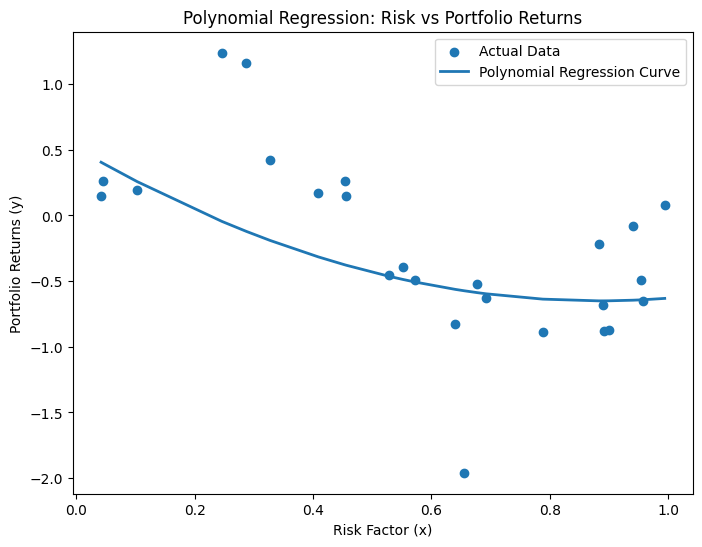


Trend Interpretation:
The polynomial regression model shows a non-linear relationship. Portfolio returns initially increase with higher risk exposure; however, after a certain point, the rate of return growth diminishes, indicating increased risk without proportional reward.


In [ ]:
# ================================
# TASK 3: Regression Analysis 
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -------- Load Dataset --------
df = pd.read_csv("Task3_Data_Process.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of dataset:")
print(df.head())

# -------- Separate X (Risk) and Y (Return) --------
X = df.iloc[:, 0].values.reshape(-1, 1)   # Risk factor (x)
y = df.iloc[:, 1].values                # Portfolio returns (y)

# -------- Polynomial Feature Transformation --------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# -------- Train-Test Split --------
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# -------- Train Regression Model --------
model = LinearRegression()
model.fit(X_train, y_train)

# -------- Prediction --------
y_pred = model.predict(X_test)

# -------- Model Evaluation --------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

# -------- Visualization --------
# Sort values for smooth curve
X_sorted = X[np.argsort(X.flatten())]
X_poly_sorted = poly.transform(X_sorted)
y_curve = model.predict(X_poly_sorted)

plt.figure(figsize=(8,6))
plt.scatter(X, y, label="Actual Data")
plt.plot(X_sorted, y_curve, linewidth=2, label="Polynomial Regression Curve")
plt.xlabel("Risk Factor (x)")
plt.ylabel("Portfolio Returns (y)")
plt.title("Polynomial Regression: Risk vs Portfolio Returns")
plt.legend()
plt.show()

# -------- Trend Identification --------
print("\nTrend Interpretation:")
print(
    "The polynomial regression model shows a non-linear relationship. "
    "Portfolio returns initially increase with higher risk exposure; "
    "however, after a certain point, the rate of return growth diminishes, "
    "indicating increased risk without proportional reward."
)
